In [35]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy
from tqdm import tqdm
import numpy as np
from sklearn.metrics.pairwise import euclidean_distances


x,y = make_classification(n_samples=10000, n_features=2, n_informative=2, n_redundant= 0, n_clusters_per_class=1, random_state=60)
X_train, X_test, y_train, y_test = train_test_split(x,y,stratify=y,random_state=42)

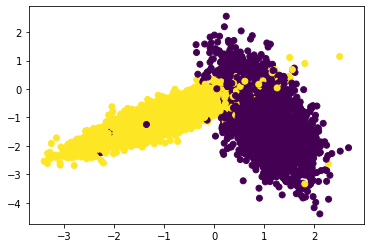

In [38]:
%matplotlib inline
import matplotlib.pyplot as plt
colors = {0:'red', 1:'blue'}
plt.scatter(X_train[:,0], X_train[:,1],c=y_train)
plt.show()

# Implementing Custom RandomSearchCV

In [50]:
import pandas as pd
def RandomSearchCV(x_train,y_train,classifier, param_range, folds):
    #generate 10 random numbers in the param_range
    n_neighbors = list(random.sample(range(param_range[0],param_range[1]), 10))
    # sort the n_neighbors so that it will help in line plot while plotting for train and cv accuracies
    n_neighbors.sort()
    # get the indices of the x_train
    indices = np.array(list(pd.DataFrame(x_train).index))
    # split the indices into folds number of groups
    grouped_indices = np.array_split(indices,folds)
    # create the train and cv_scores list to store the train and test accuracies for various values of k
    train_scores = list()
    cv_scores = list()
    # for each randomy generated neighbor(hyper-parameter)
    for k in tqdm(n_neighbors):
        # create the train_folds and cv_folds to store the train and test accuracies for each fold
        train_folds = list()
        cv_folds = list()
        # loop through number of folds
        for i in range(folds):
            # get the test_indices
            test_indices = grouped_indices[i]
            # get the train_indices
            train_indices = list(set(list(range(0, len(x_train)))) - set(test_indices))
            # get the data for X_train,Y_train,X_test,Y_test  using the above train_indices and test _indices
            X_train = x_train[train_indices]
            Y_train = y_train[train_indices]
            X_test  = x_train[test_indices]
            Y_test  = y_train[test_indices]
            # set the n_neighbors attribute of clasifier to k
            classifier.n_neighbors = k
            # training phase
            classifier.fit(X_train,Y_train)
            # testing on cv data
            Y_predicted = classifier.predict(X_test)
            # calcaute the accuracy on cv (validation accuracy)
            cv_folds.append(accuracy_score(Y_test, Y_predicted))
            # testing phase on training data
            Y_predicted = classifier.predict(X_train)
            # calculate the accuracy on training data(training accuracy)
            train_folds.append(accuracy_score(Y_train, Y_predicted))
        # determine the mean training and validation accuracies for each k and append to final train_scores and test_scores
        train_scores.append(np.mean(np.array(train_folds)))
        cv_scores.append(np.mean(np.array(cv_folds)))
    return train_scores, cv_scores,n_neighbors

# plotting to detect the optimal k

100%|██████████| 10/10 [00:06<00:00,  1.45it/s]


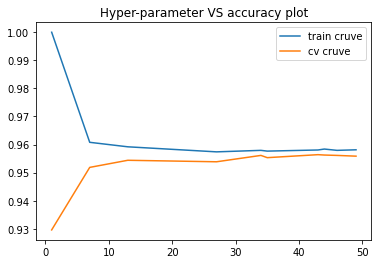

In [51]:
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import random
import warnings
warnings.filterwarnings("ignore")


neigh = KNeighborsClassifier()
folds = 3

trainscores,testscores,n_neighbors = RandomSearchCV(X_train, y_train, neigh, (1,50), folds)
plt.plot(n_neighbors,trainscores, label='train cruve')
plt.plot(n_neighbors,testscores, label='cv cruve')
plt.title('Hyper-parameter VS accuracy plot')
plt.legend()
plt.show()

**we can conclude that using k=43 will be well fit**

# plotting Decision Surface using optimal K

In [ ]:
# understanding this code line by line is not that importent 
def plot_decision_boundary(X1, X2, y, clf):
        # Create color maps
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
    cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

    x_min, x_max = X1.min() - 1, X1.max() + 1
    y_min, y_max = X2.min() - 1, X2.max() + 1
    
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
    # Plot also the training points
    plt.scatter(X1, X2, c=y, cmap=cmap_bold)
    
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("2-Class classification (k = %i)" % (clf.n_neighbors))
    plt.show()

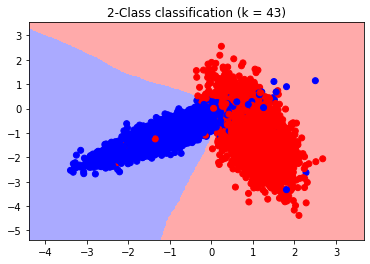

In [ ]:
from matplotlib.colors import ListedColormap
neigh = KNeighborsClassifier(n_neighbors = 43)
neigh.fit(X_train, y_train)
plot_decision_boundary(X_train[:, 0], X_train[:, 1], y_train, neigh)

**well we have a good decision surface with optimal k=43**

In [49]:
knn=KNeighborsClassifier(n_neighbors=34)
knn.fit(X_train,y_train)
Y_predicted = knn.predict(X_test)
print(accuracy_score(y_test, Y_predicted))


0.9676


In [45]:
from sklearn.model_selection import RandomizedSearchCV
k_range = list(range(1,50))
param_dict = dict(n_neighbors=k_range,weights=['uniform','distance'])
knn=KNeighborsClassifier()
rand = RandomizedSearchCV(knn, param_dict, cv=3, scoring='accuracy', n_iter=10, random_state=10)
rand.fit(X_train, y_train)

RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=KNeighborsClassifier(algorithm='auto',
                                                  leaf_size=30,
                                                  metric='minkowski',
                                                  metric_params=None,
                                                  n_jobs=None, n_neighbors=5,
                                                  p=2, weights='uniform'),
                   iid='deprecated', n_iter=10, n_jobs=None,
                   param_distributions={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8,
                                                        9, 10, 11, 12, 13, 14,
                                                        15, 16, 17, 18, 19, 20,
                                                        21, 22, 23, 24, 25, 26,
                                                        27, 28, 29, 30, ...],
                                        'weights': ['uniform', 'distance']}

In [46]:
rand.best_params_

{'n_neighbors': 34, 'weights': 'uniform'}